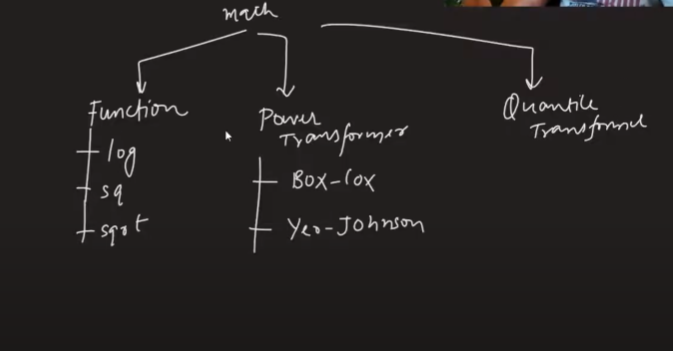

### class we have to use in power transformation is sklearn.preprocessing.PowerTransformer

### Box cox transformation

It is applicable to strictly numbers greater than zero

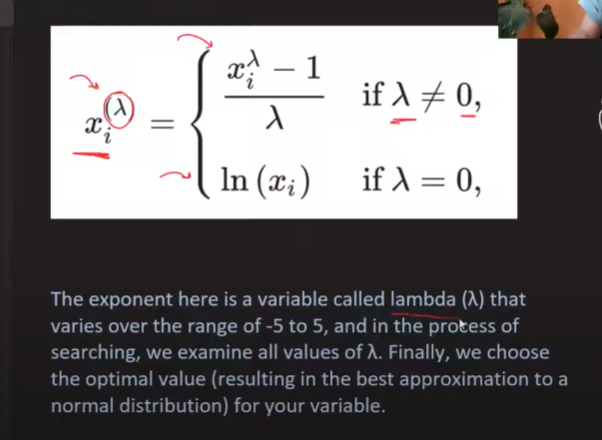

Internal working is difficult. Dont go to find how it works, just observe how it work..

One of the method in internal working is 'Maximum Likelyhood' and other is 'Baysian statistics'

## Yeo-Johnson Transformation

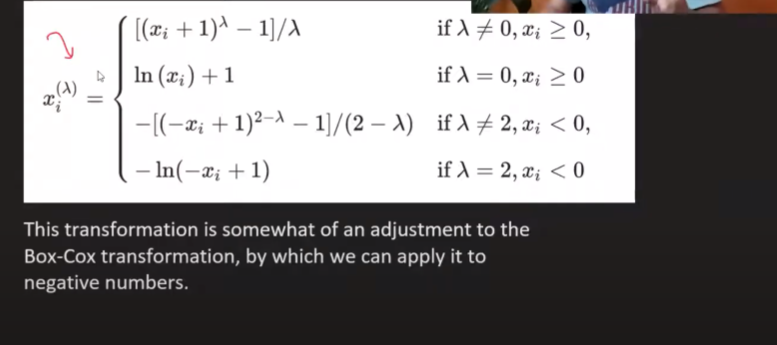

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PowerTransformer
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score


In [8]:
df = pd.read_csv('E:\\ml_revision\\function_transformations\\datasets\\concrete_data.csv')

In [11]:
print("shape -> ", df.shape)
df.head()

shape ->  (1030, 9)


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [10]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [21]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Here minimum values for some columns is zero which will make hurdles in box cox transformation

we have to fix that stuff

In [12]:
x = df.drop(columns = 'Strength')
y = df['Strength']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

### Distribution before any transformation

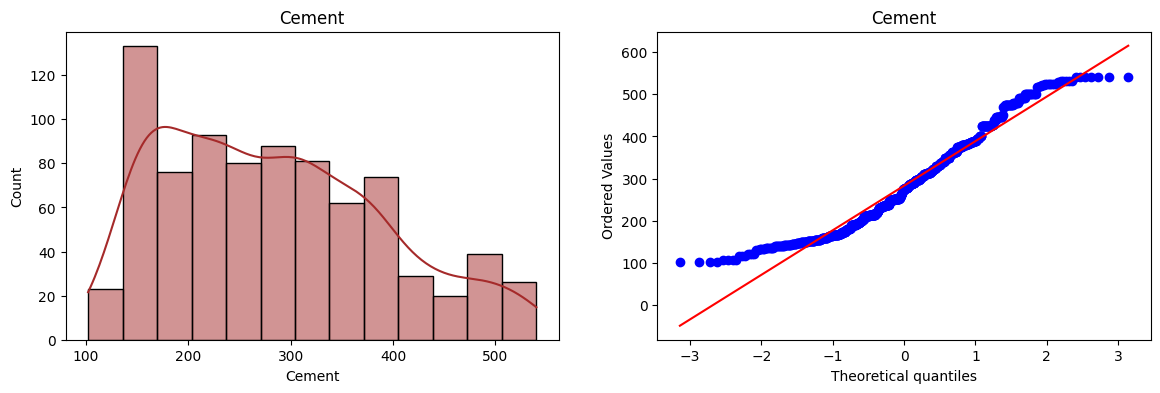

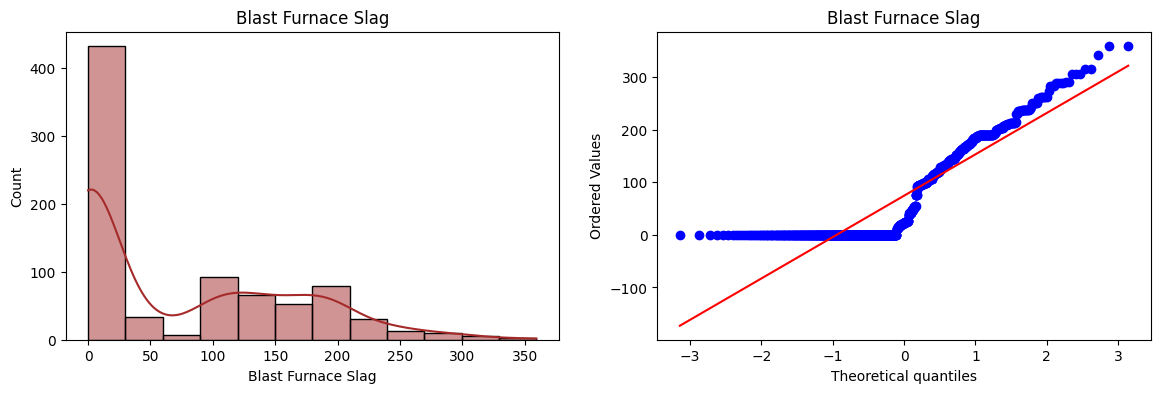

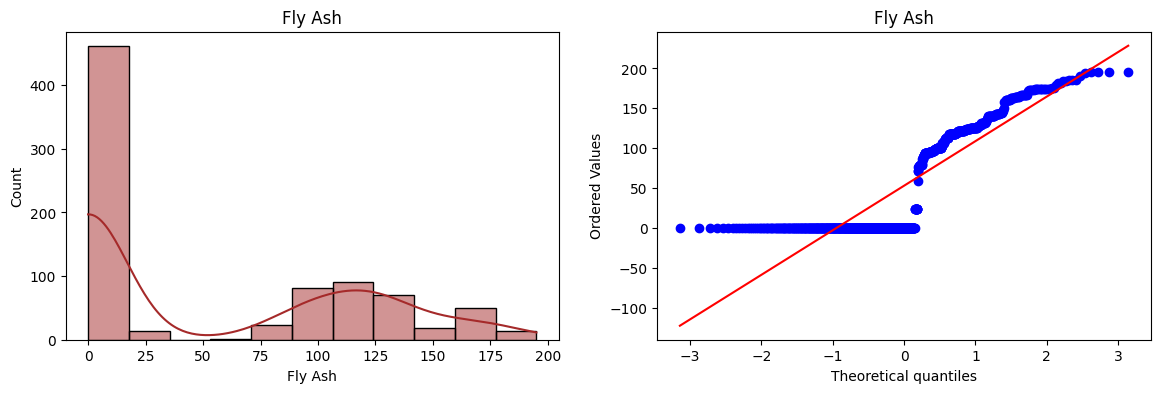

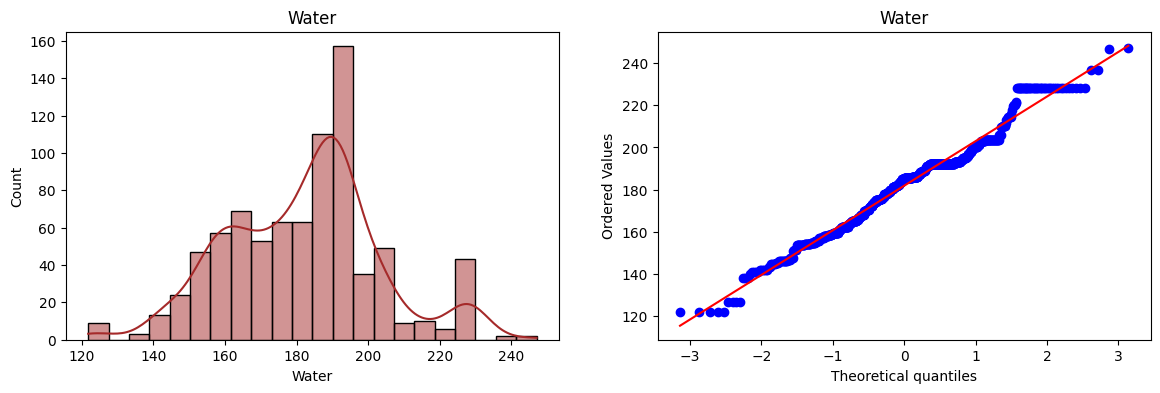

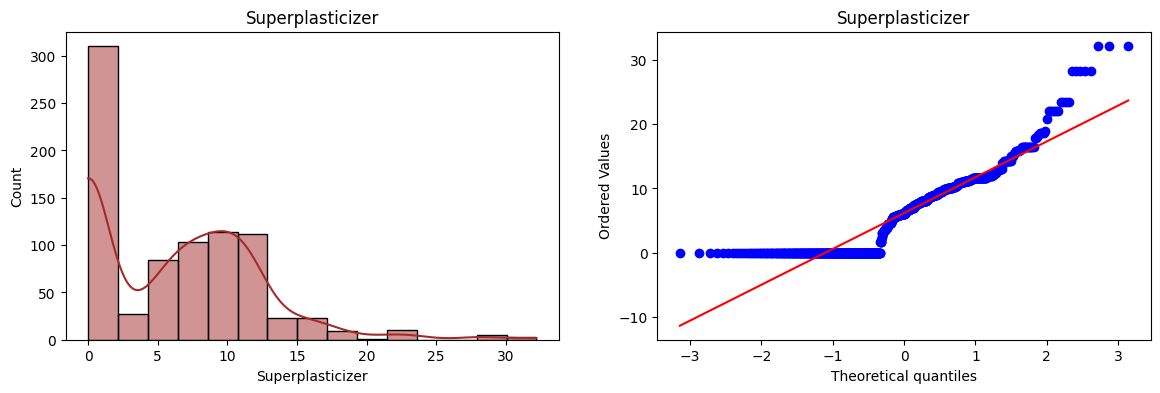

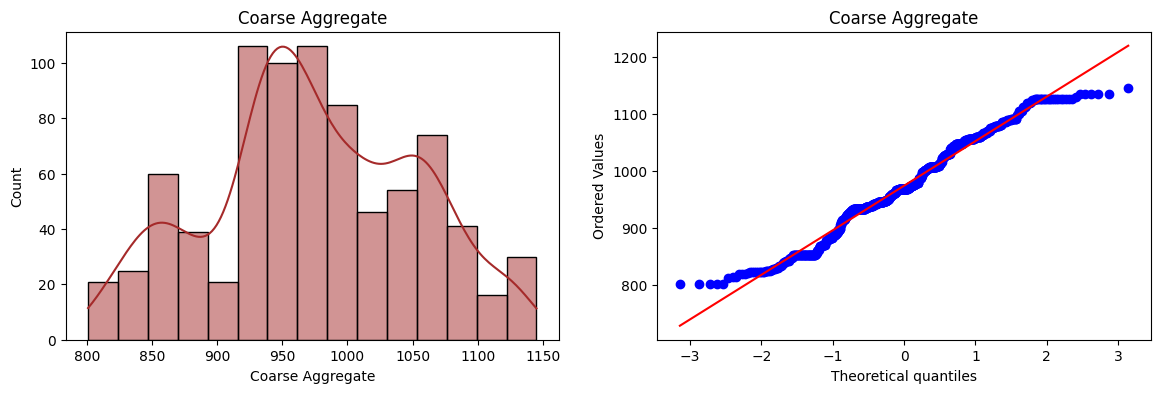

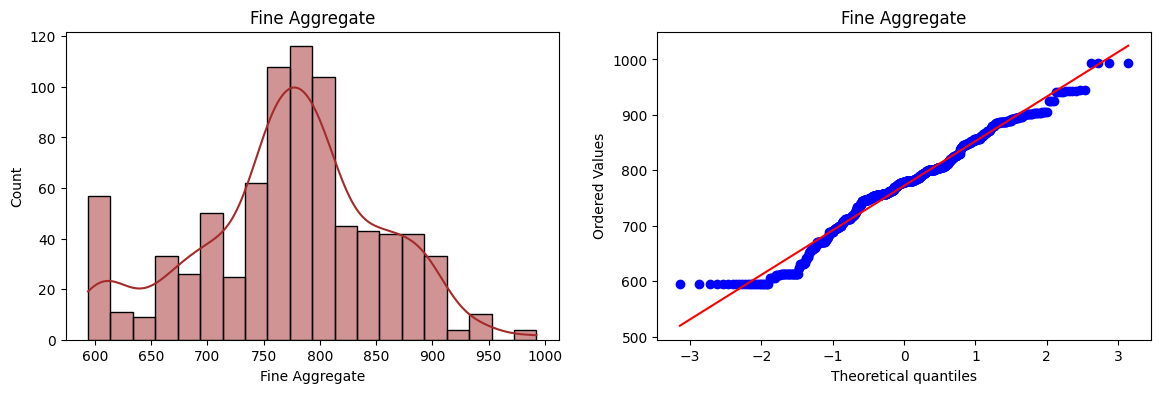

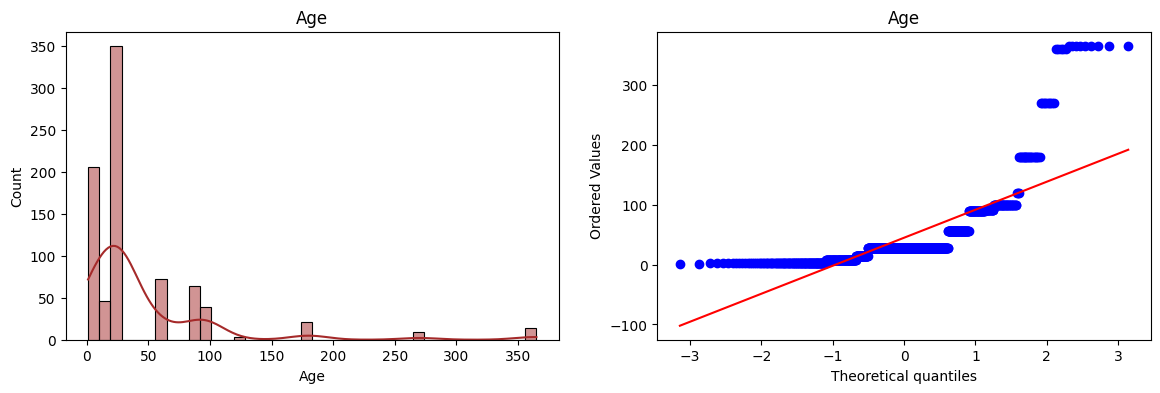

In [20]:
for col in x_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x_train[col], color = 'brown', kde = True)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(x_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [47]:
from sklearn.metrics import r2_score

svr1 = SVR()

svr1.fit(x_train, y_train)
y_pred1_svr1 = svr1.predict(x_test)

print("R2 Score -> ", r2_score(y_test, y_pred1_svr1))

print("Cross validation score : ", cross_val_score(svr1, x_train, y_train, cv = 5, scoring='r2').mean())

R2 Score ->  0.2319792895104038
Cross validation score :  0.2205476228194469


### Box Cox transformation

In [48]:
pt = PowerTransformer(method = 'box-cox')

In [49]:
x_train_bx = pt.fit_transform(x_train + 0.0001)
x_test_bx = pt.transform(x_test + 0.0001)
pd.DataFrame({'cols': x_train.columns, 'box_cox_lambdas': pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.031051
2,Fly Ash,-0.052019
3,Water,0.772681
4,Superplasticizer,0.133968
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066626


In [50]:
x_train_bx = pd.DataFrame(x_train_bx, columns = x_train.columns)

In [51]:
print(type(x_train_bx))
x_train_bx.head()

<class 'pandas.core.frame.DataFrame'>


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,-1.279751,0.966448,1.128413,-0.301920,0.946729,-0.262500,-0.677568,0.106010
1,1.244706,0.635282,1.141059,-0.165055,0.740568,-1.912728,-0.314062,0.106010
2,0.079842,-1.083403,1.132876,-1.047291,0.794378,1.018407,0.025957,-1.675969
3,-0.145641,0.890509,1.086426,0.581224,0.719475,-1.750779,0.583253,0.106010
4,-1.131044,0.745888,1.135187,-1.105297,0.825583,1.368575,0.262623,-1.675969


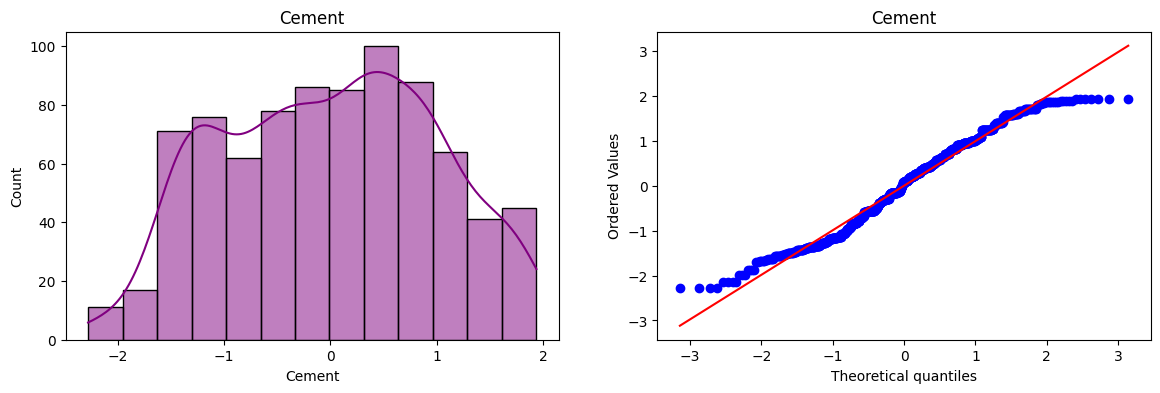

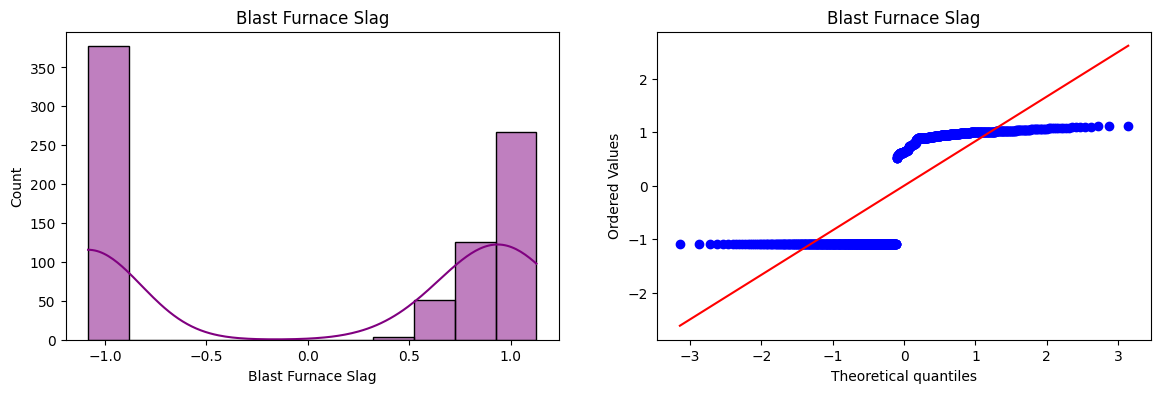

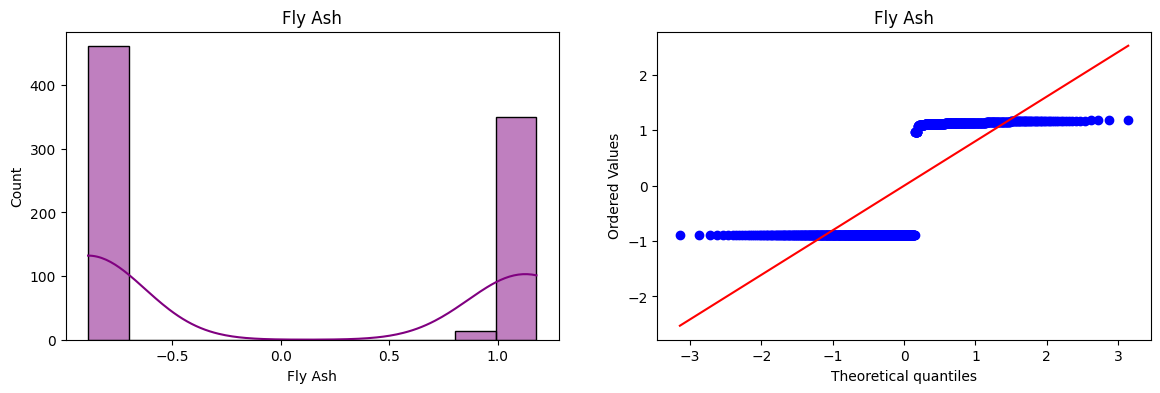

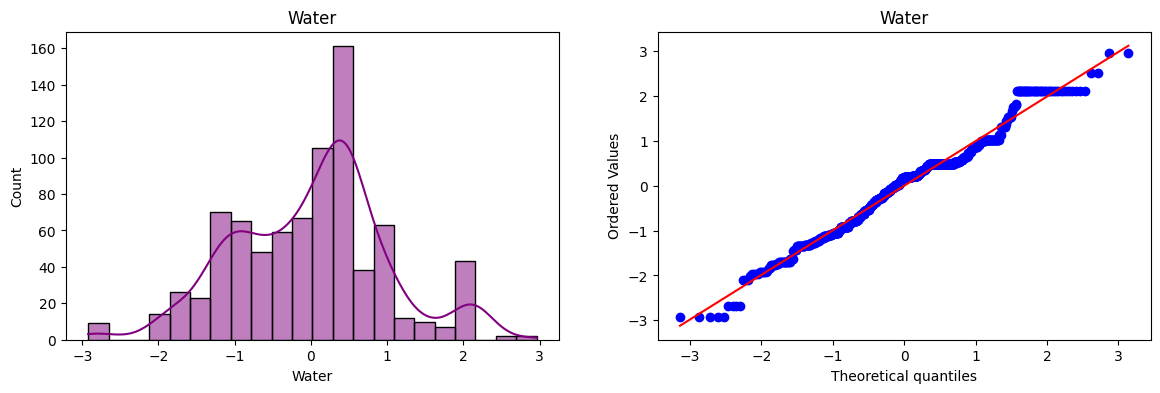

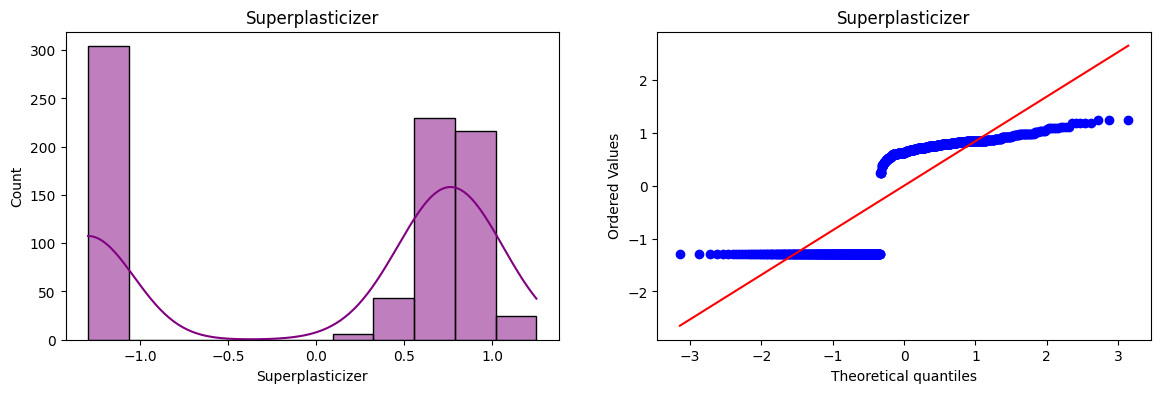

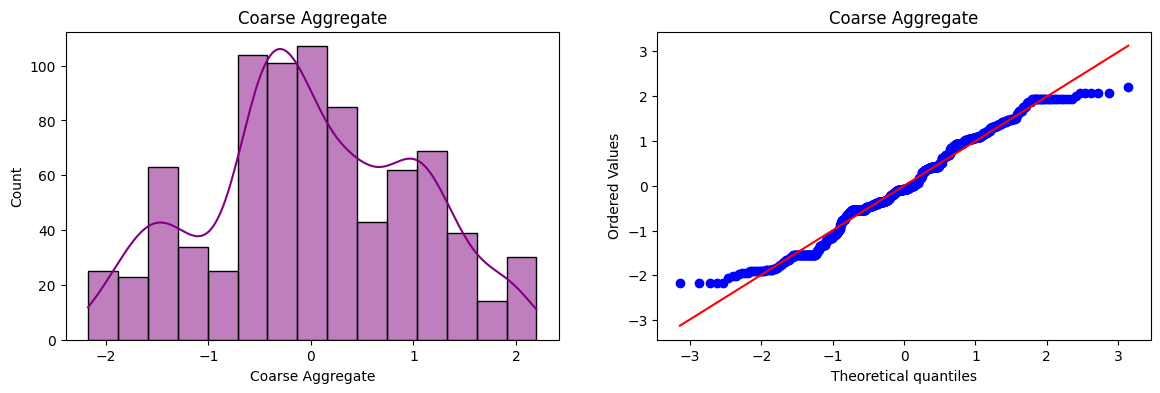

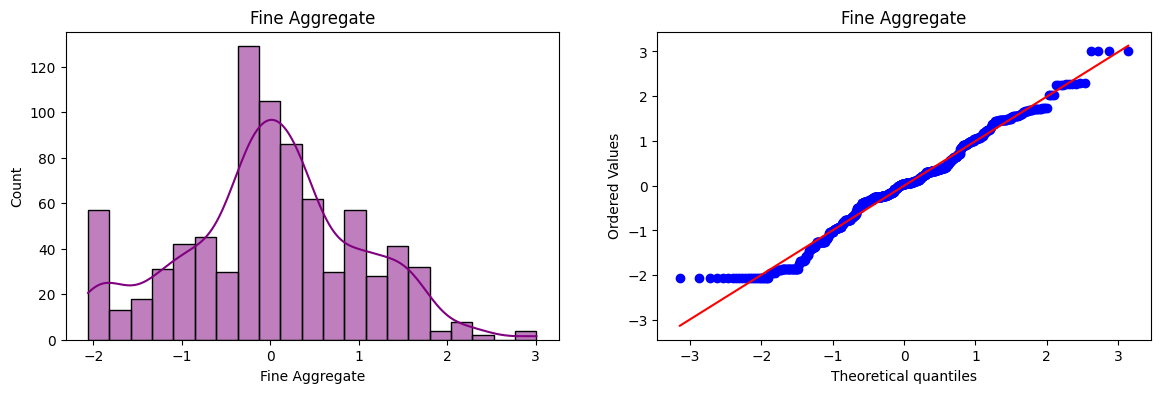

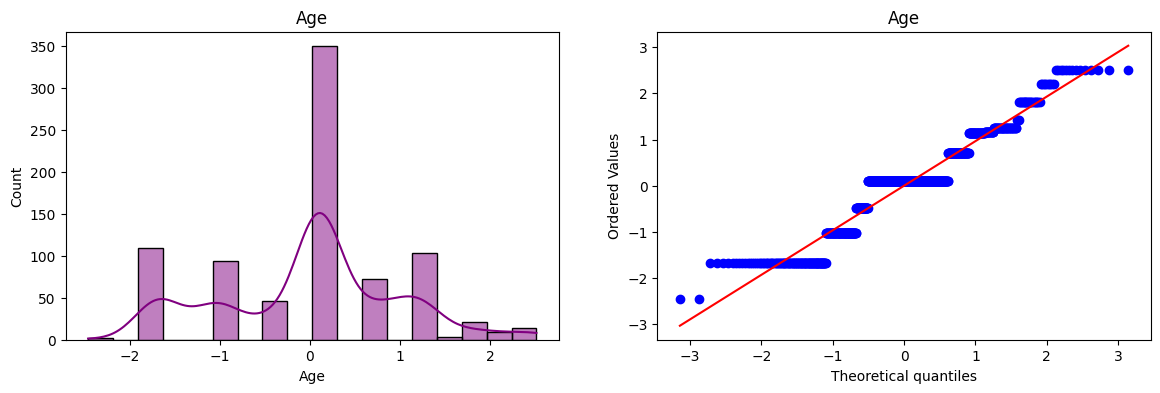

In [52]:
for col in x_train_bx.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x_train_bx[col], color = 'purple', kde = True)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(x_train_bx[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [53]:
svr2 = SVR()

svr2.fit(x_train_bx, y_train)
y_pred2_svr2 = svr2.predict(x_test_bx)

print("R2 Score -> ", r2_score(y_test, y_pred2_svr2))

print("Cross validation score : ", cross_val_score(svr2, x_train_bx, y_train, cv = 5, scoring='r2').mean())

C:\Users\Aditya\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


R2 Score ->  0.8007130775775493
Cross validation score :  0.7876755262970933


### Yeo-Johnson transformation

In [54]:
pt2 = PowerTransformer(method = 'yeo-johnson')

In [65]:
x_train_yj = pt2.fit_transform(x_train)
x_test_yj = pt2.transform(x_test)
pd.DataFrame({'cols': x_train.columns, 'yeo_johnson_lambdas': pt2.lambdas_})


,cols,yeo_johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [ ]:
x_train_yj = pd.DataFrame(x_train_yj, columns = x_train.columns)

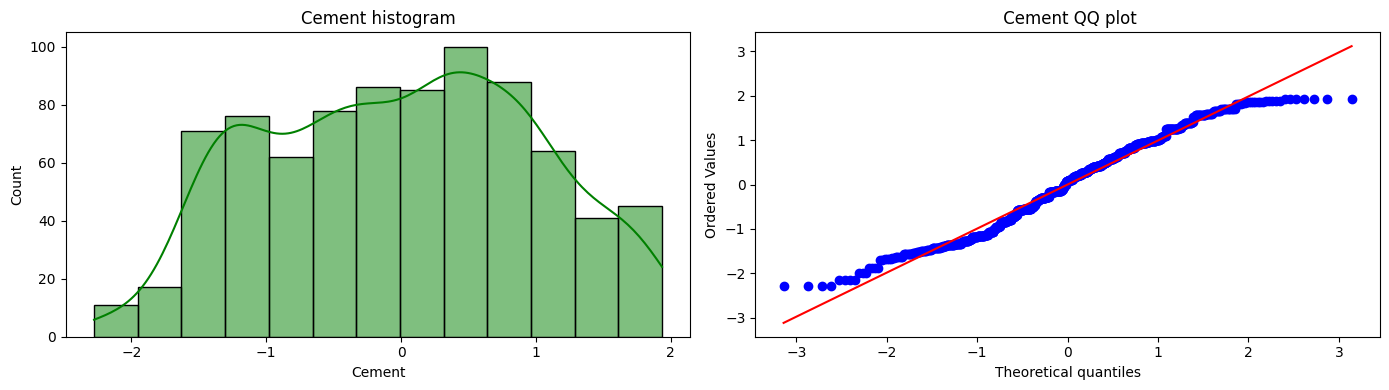

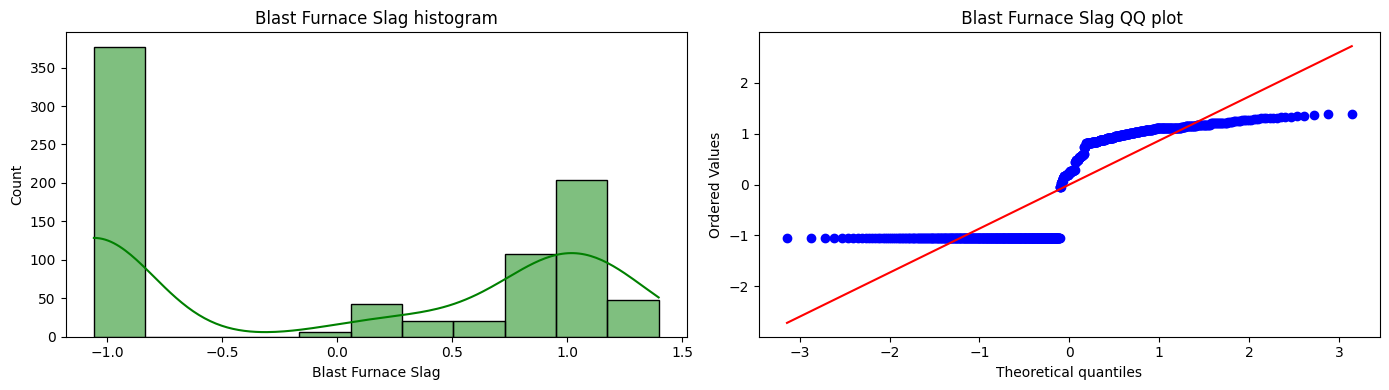

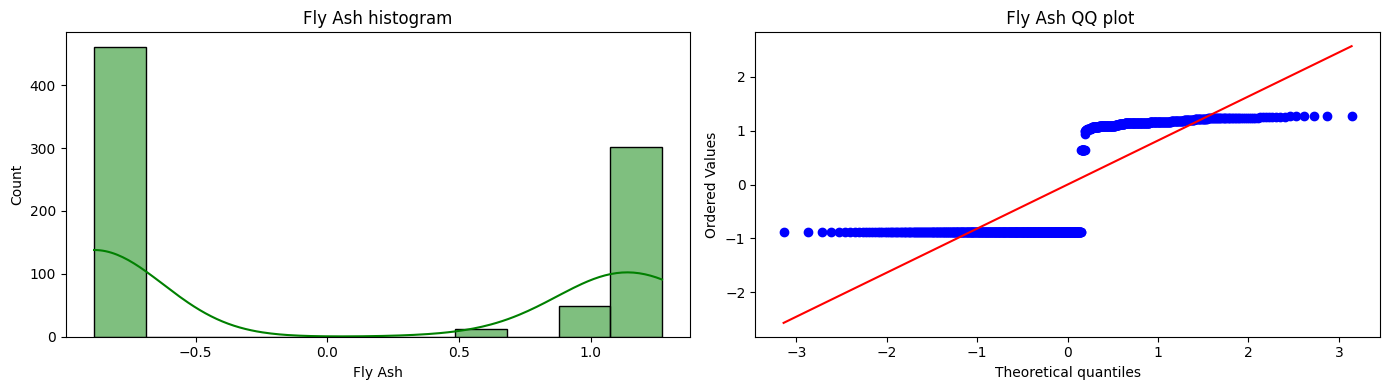

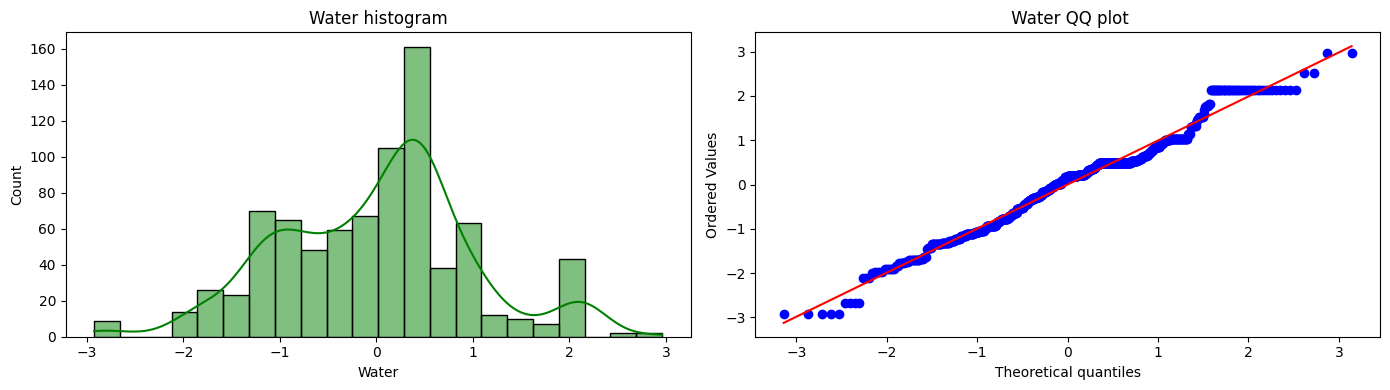

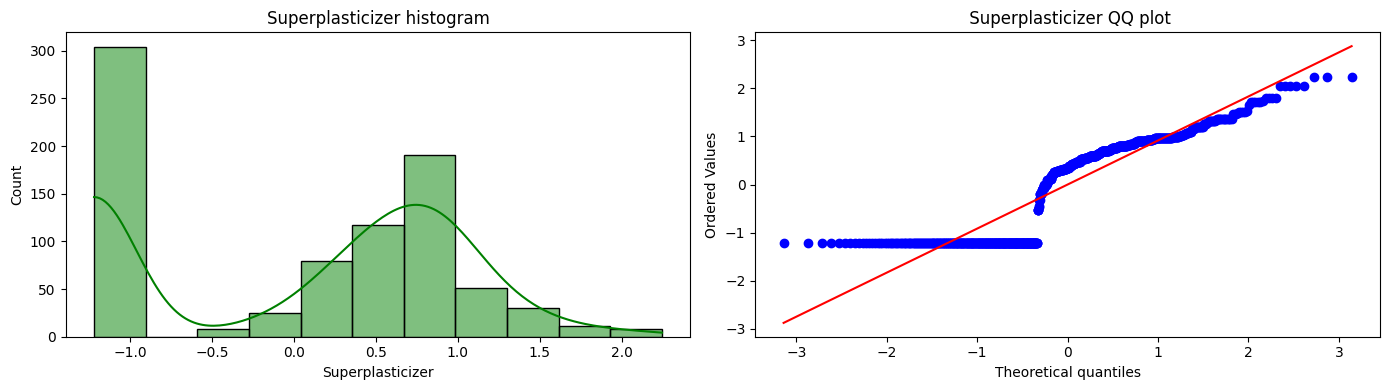

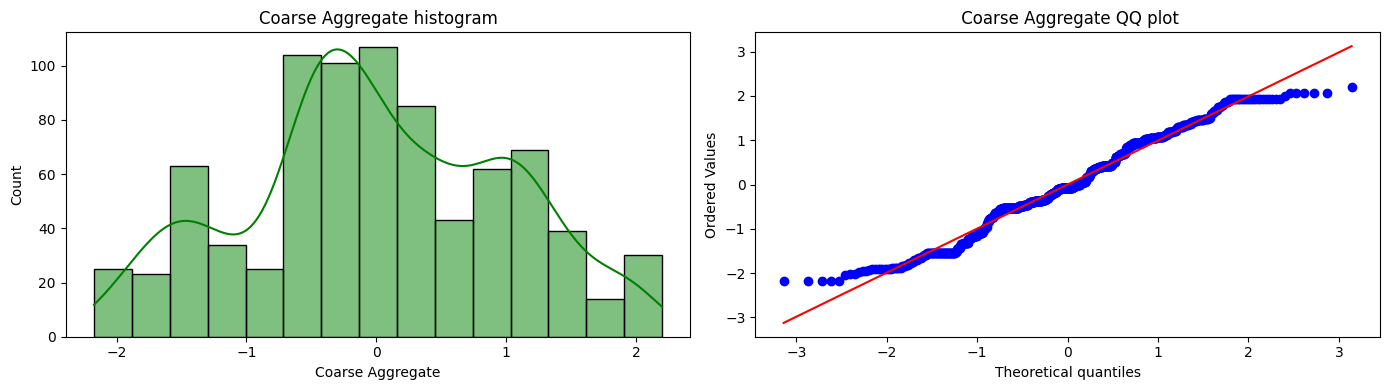

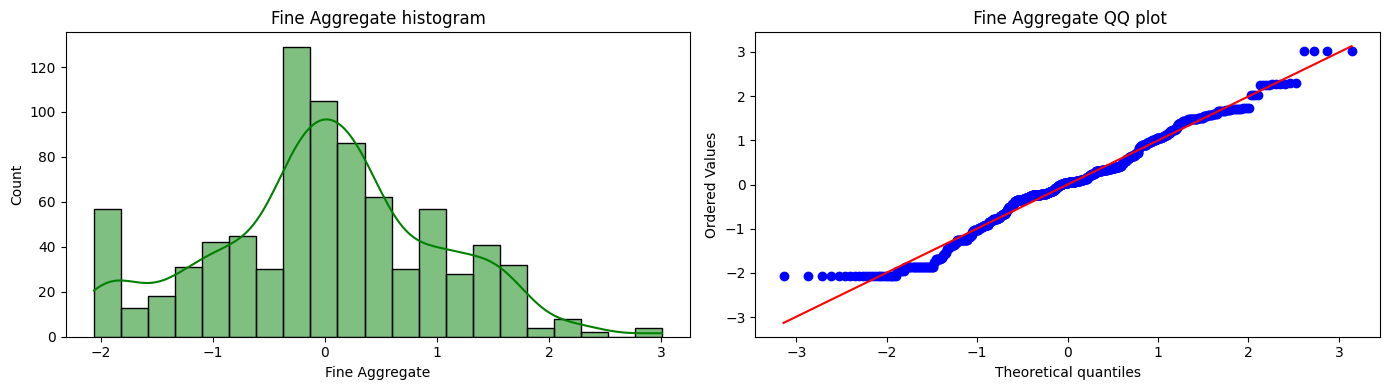

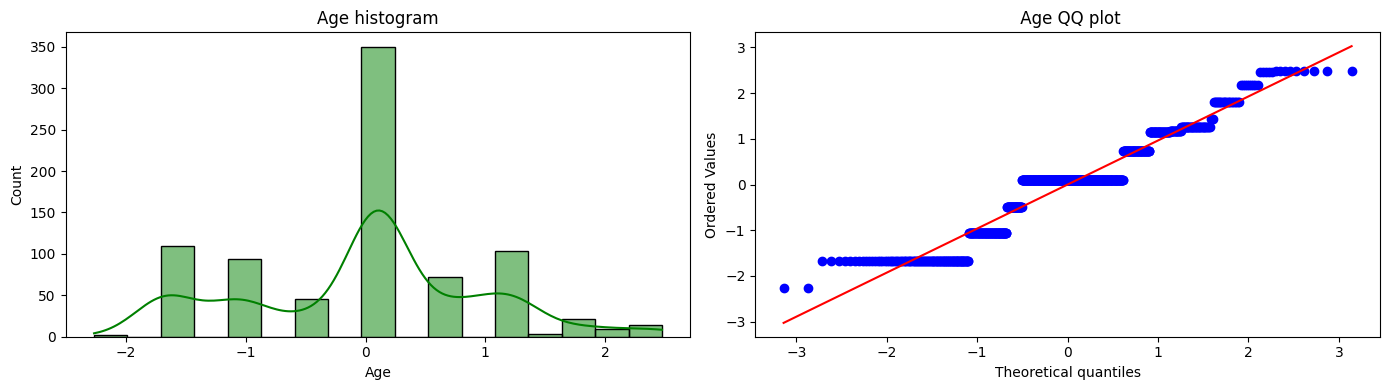

In [69]:
for col in x_train_yj.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x_train_yj[col], color = 'green', kde = True)
    plt.title(f"{col} histogram")

    plt.subplot(122)
    stats.probplot(x_train_yj[col],  dist="norm", plot=plt)
    plt.title(f" {col} QQ plot")

    plt.tight_layout()
    plt.show()



In [70]:
svr3 = SVR()

svr3.fit(x_train_yj, y_train)
y_pred3_svr3 = svr3.predict(x_test)

print("R2 score : ", r2_score(y_test, y_pred3_svr3))
print("cross_val_score : ", cross_val_score(svr3, x_train_yj, y_train, cv = 5, scoring='r2').mean())


R2 score :  -0.0019754290982656464
cross_val_score :  0.7843804014236314
